In [5]:
#https://www.youtube.com/watch?v=MtG9cueB548&list=PLm7vssGgA4rEe-Oe3_RjvcZ4wfFL8Ht7w&index=11&ab_channel=Mr.PSolver
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [6]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

In [12]:
the1, the2, phi1, phi2 = smp.symbols(r'\theta_1, \theta_2 \phi_1 \phi_2', cls=smp.Function)

In [14]:
the1 = the1(t)
the2 = the2(t)
phi1 = phi1(t)
phi2 = phi2(t)

In [16]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
phi1_d = smp.diff(phi1, t)
phi2_d = smp.diff(phi2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)
phi1_dd = smp.diff(phi1_d, t)
phi2_dd = smp.diff(phi2_d, t)

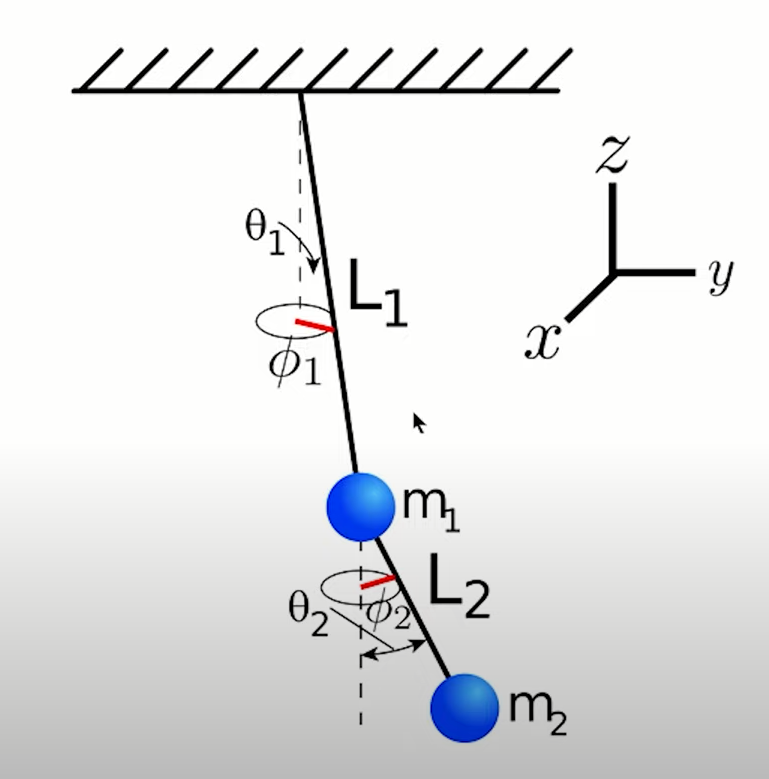

In [17]:
x1 = L1*smp.sin(the1)*smp.cos(phi1)
y1 = L1*smp.sin(the1)*smp.sin(phi1)
z1 = -L1*smp.cos(the1)

x2 = x1 + L2*smp.sin(the2)*smp.cos(phi2)
y2 = y1 + L2*smp.sin(the2)*smp.sin(phi2)
z2 = z1 - L2*smp.cos(the2)

In [20]:
x1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x1)
y1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y1)
z1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z1)

x2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x2)
y2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y2)
z2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z2)

In [24]:
# Kinetic energy: it's 1/2mV^2 
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + smp.diff(z1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2 + smp.diff(z2, t)**2)
T = T1 + T2

# potential energy
V1 = m1*g*z1
V2 = m2*g*z2
V = V1 + V2

# lagrangian 
L = T-V



In [26]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()
LE3 = smp.diff(L, phi1) - smp.diff(smp.diff(L, phi1_d), t).simplify()
LE4 = smp.diff(L, phi2) - smp.diff(smp.diff(L, phi2_d), t).simplify()

In [ ]:
# sympy.solve() assumes all [LE1, LE2, LE3, LE4] each are equal to zero
sols = smp.solve([LE1, LE2, LE3, LE4], (the1_dd, the2_dd, phi1_dd, phi2_dd), simplify=False, rational=False)

In [ ]:
# we turned 4 second order differential equations into 8 first order differential equations (4 of them are just mou3amil) bcz sympy can't solve second orders, check a bit before 21:51 in video

do1dt_t = smp.lambdify([t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d, phi1, phi2, phi1_d, phi2_d), sols[the1_dd]])
do2dt_t = smp.lambdify([t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d, phi1, phi2, phi1_d, phi2_d), sols[the2_dd]])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dw1dt_t = smp.lambdify([t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d, phi1, phi2, phi1_d, phi2_d), sols[phi1_dd]])
dw2dt_t = smp.lambdify([t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d, phi1, phi2, phi1_d, phi2_d), sols[phi2_dd]])
dphi1dt_f = smp.lambdify(the1_d, phi1_d)
dphi2dt_f = smp.lambdify(the2_d, phi2_d)

In [ ]:
def dSdt(S, t, m1, m2, L1, L2):
    the1, the2, phi1, phi2, o1, o2, w1, w2 = S
    return [
        dthe1dt_f(o1),
        dthe2dt_f(o2),
        dphi1dt_f(w1),
        dphi2dt_f(w2),
        do1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        do2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
    ]

In [ ]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1=2
m2=1
L1=2
L2=1
ans = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 3, 4, -3, -4], t=t, args=(g, m1,m2, L1, L2))